## **A. Load thư viện**

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, tree, ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## **B. Phân loại Decision Tree Classification**

> ### **1. Load dữ liệu hoa Iris, phân tích tính chất "white box" của các đặc trưng**




,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


Số dữ liệu tập train: 105 và tập test: 45


Text(0.5, 1.0, 'Dữ liệu tập train')

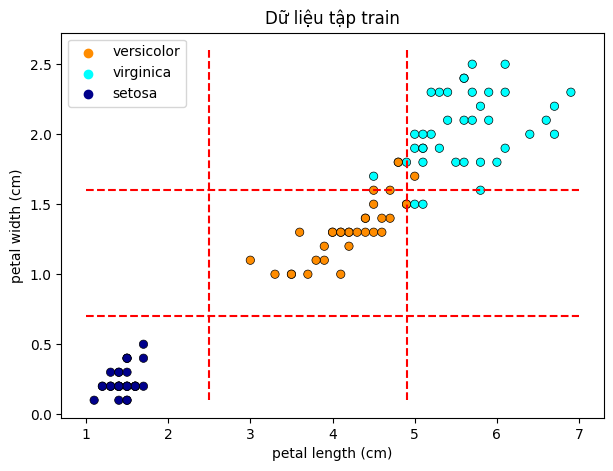

In [2]:
iris = datasets.load_iris(as_frame=True)
X_iris = iris.data[iris.feature_names[2:]]
y_iris = iris.target
display(X_iris.head(5))

X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.3, random_state=0)
print("Số dữ liệu tập train: %i và tập test: %i" % (X_train.shape[0], X_test.shape[0]))

cmap = ["darkorange", "cyan", "darkblue"]
plt.figure(figsize=(7,5))
sns.scatterplot(x=X_train['petal length (cm)'], y=X_train['petal width (cm)'], hue=iris.target_names[y_train], palette=cmap, edgecolor="black")
plt.vlines(x=2.5, ymin = 0.1, ymax = 2.6, linestyles='dashed', colors='red')
plt.vlines(x=4.9, ymin = 0.1, ymax = 2.6, linestyles='dashed', colors='red')
plt.hlines(y=0.7, xmin = 1, xmax = 7, linestyles='dashed', colors='red')
plt.hlines(y=1.6, xmin = 1, xmax = 7, linestyles='dashed', colors='red')
plt.title("Dữ liệu tập train")

> *Nhận xét: Dựa vào biểu đồ mô tả chiều dài và chiều rộng cánh hoa Iris, ta thấy các loài hoa có thể được phân loại dựa vào:*
>> *- Hai ngưỡng chiều dài cánh hoa là 2.5cm và 4.9cm*

>> *- Hai ngưỡng chiều rộng cánh hoa là 0.7cm và 1.6cm*

>> *- Hai ngưỡng chiều dài = 2.5cm, chiều rộng = 1.6cm*

>> *- Hai ngưỡng chiều rộng = 0.7cm, chiều dài = 4.9cm*

> **Chú ý:** Có thể dùng nhiều hơn 2 ngưỡng về chiều dài hoặc chiều rộng để phân loại các loài hoa.

> ### **2. Mô hình Decision tree, dự đoán và đánh giá độ chính xác**




Độ chính xác phân loại của tập train: 96.19% và tập test: 91.11%


Text(0.5, 1.0, 'Biều đồ phân loại hoa của Decision Tree')

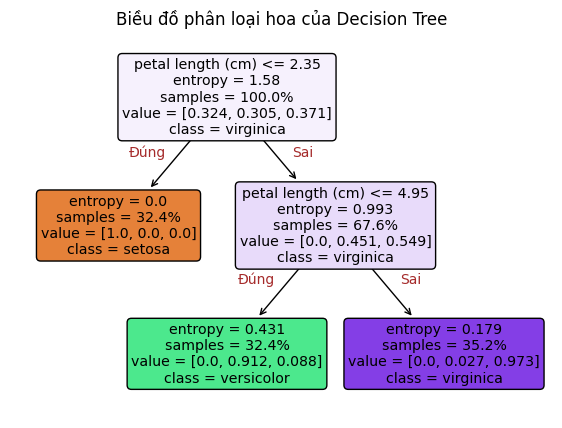

In [3]:
DT = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2)
DT.fit(X_train, y_train)

acc_scr_train = DT.score(X_train, y_train)
acc_scr_test = DT.score(X_test, y_test)
print("Độ chính xác phân loại của tập train: %.2f%% và tập test: %.2f%%" % (acc_scr_train*100, acc_scr_test*100))

plt.figure(figsize=(7,5))
tree.plot_tree(DT, feature_names=iris.feature_names[2:], class_names=iris.target_names, rounded=True, filled=True, proportion=True)
plt.annotate('Đúng',(0.22,0.68), color='brown', size=10)
plt.annotate('Sai',(0.52,0.68), color='brown', size=10)
plt.annotate('Đúng',(0.42,0.35), color='brown', size=10)
plt.annotate('Sai',(0.72,0.35), color='brown', size=10)
plt.title('Biều đồ phân loại hoa của Decision Tree')

> *Nhận xét: Dựa vào ngưỡng chiều rộng cánh hoa 0.75cm có thể phân loại được hoa setosa với độ chính xác cao. Sau đó dựa vào ngưỡng chiều dài cánh hoa 4.95cm có thể phân loại được 2 loại hoa còn lại.*

> ### **3. Một số cải tiến mô hình Decision Tree cơ bản**

>> ***a) Thay đổi "depth" của Decision Tree***

	 Decision tree depth	 Độ chính xác tập train	 Độ chính xác tập test
		 d = 2			 96.19% 		 91.11%
		 d = 3			 98.10% 		 97.78%
		 d = 4			 99.05% 		 97.78%


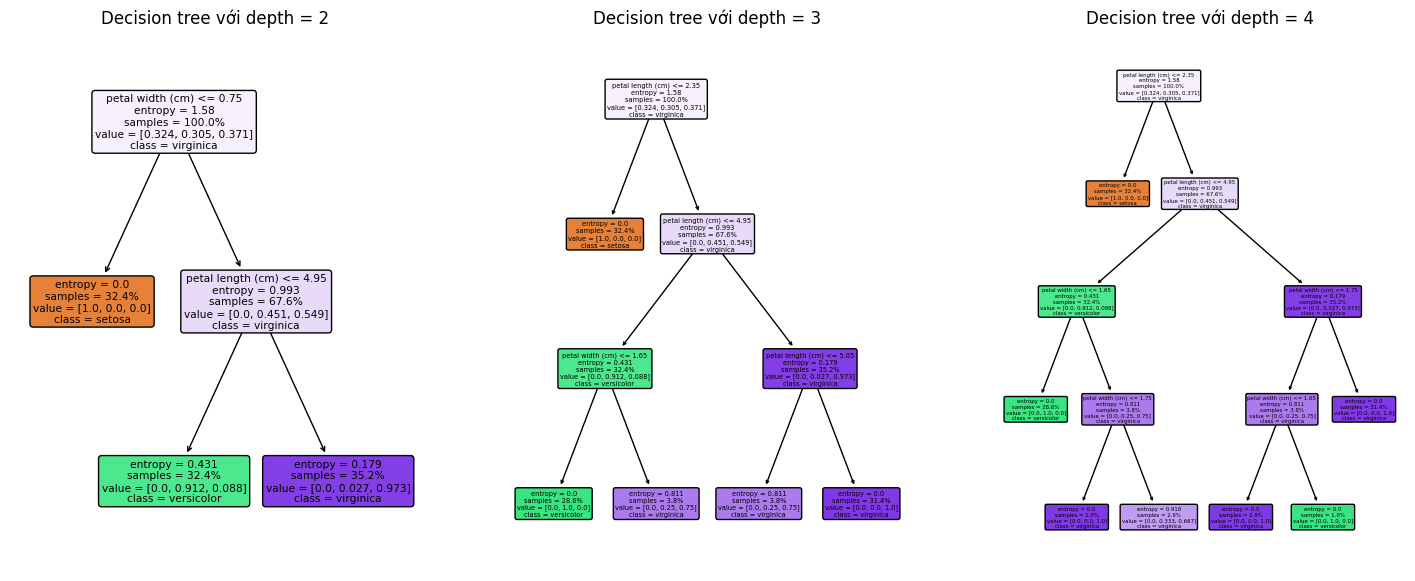

In [4]:
depth = [2,3,4]

plt.figure(figsize=(18,7))
print("\t Decision tree depth\t Độ chính xác tập train\t Độ chính xác tập test")
for i,d in enumerate(depth):
  DT = tree.DecisionTreeClassifier(criterion='entropy', max_depth=d)
  DT.fit(X_train, y_train)
  acc_scr_train = DT.score(X_train, y_train)
  acc_scr_test = DT.score(X_test, y_test)
  print("\t\t d = %d\t\t\t %.2f%% \t\t %.2f%%" %(d,acc_scr_train*100, acc_scr_test*100))
  plt.subplot(1,3,i+1)
  tree.plot_tree(DT, feature_names=iris.feature_names[2:], class_names=iris.target_names, rounded=True, filled=True, proportion=True)
  plt.title("Decision tree với depth = %d" % (d))

> *Chú ý: Thông thường "depth" của Decision tree càng lớn thì mô hình dễ bị overfitting, càng nhỏ thì dễ bị underfitting.*

>> ***b) Lựa chọn tiêu chí đánh giá các điều kiện tách cho mỗi đặc trưng dữ liệu***

>> Các tiêu chí: **Gini_Index, Entropy, Log_Loss (Bài tập)**

## **C. Phân loại Random Forest Classification**

> ### **1. Load dữ liệu hoa Iris**




In [5]:
iris = datasets.load_iris(as_frame=True)
X_iris = iris.data
y_iris = iris.target
display(X_iris.head(5))

X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.3, random_state=0)
print("Số dữ liệu tập train: %i và tập test: %i" % (X_train.shape[0], X_test.shape[0]))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Số dữ liệu tập train: 105 và tập test: 45


> ### **2. Mô hình Random Forest, dự đoán và đánh giá độ chính xác, độ quan trọng các đặc trưng**

In [6]:
RF = ensemble.RandomForestClassifier(n_estimators = 50, bootstrap = True, criterion = 'gini', max_depth = 3)
RF.fit(X_train, y_train)

acc_scr_train = RF.score(X_train, y_train)
acc_scr_test = RF.score(X_test, y_test)
print("Độ chính xác phân loại của tập train: %.2f%% và tập test: %.2f%%" % (acc_scr_train*100, acc_scr_test*100))

print("Độ quan trọng của các đặc trưng:")
pd.DataFrame({'Đặc trưng': RF.feature_names_in_, 'Độ quan trọng': RF.feature_importances_})

Độ chính xác phân loại của tập train: 97.14% và tập test: 97.78%
Độ quan trọng của các đặc trưng:


,Đặc trưng,Độ quan trọng
0,sepal length (cm),0.103580
1,sepal width (cm),0.018609
2,petal length (cm),0.425260
3,petal width (cm),0.452551


> *Nhận xét: Dựa vào mức độ quan trọng phân loại của Random Forest thì 2 đặc trưng chiều dài và chiều rộng cánh hoa có vai trò quan trọng trong phân loại hoa Iris.*